In [11]:

import pandas as pd
import numpy as np

#read and parse the training set .csv features file 
df = pd.read_csv('Datasets/A3-data.txt', delimiter = ',')
df.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#read four input(features) columns
x = np.array(df[df.columns[0]])
y = np.array(df[df.columns[1]])
z = np.array(df[df.columns[2]])
t = np.array(df[df.columns[3]])

print(x)
#read one output(class) column
class_ = np.array(df[df.columns[4]])

[-3.16755250e-02  2.52598694e-03  1.83123266e-01 -4.22622245e-02
 -6.28112891e-02 -2.37765861e-02  5.24611004e-02  8.50685594e-01
  7.68056302e-02 -2.49106757e-01  1.86471184e-01  1.15023972e-01
  6.20928397e-02  3.86458158e-01  5.96832906e-01  3.48799586e-01
  8.37452035e-02 -1.45997341e-01 -7.23038966e-01  4.37934814e-01
  3.31000576e-02  8.62168393e-01 -6.28769735e-01 -4.50007815e-01
 -2.17764620e-01 -4.90941044e-03 -8.05629072e-01  5.42645576e-01
  7.41614848e-01 -7.43080152e-01 -2.54028127e-01 -5.05371434e-01
 -3.16050644e-02  5.97216691e-01  5.38405958e-01 -4.68593994e-01
 -2.24671711e-01  7.67004873e-01  1.13421659e-02  4.88062942e-02
 -6.50025570e-02 -1.36207539e-01 -1.50887337e-01 -5.44942043e-01
 -1.95159041e-01  1.73922057e-02  2.32253512e-01  2.12431792e-02
 -4.80300934e-02 -2.61998248e-01  4.87147100e-01  6.48849518e-01
 -1.27139449e-01  1.12745687e-01  2.14190936e-03  1.82876546e-02
  2.37698297e-01  6.54049569e-02 -4.03041372e-02 -1.66748306e-02
  4.46619622e-01  3.09427

In [13]:
#Turn the data into a set of points:

data = list(zip(x, y, z, t))
#print(data)


[[2.36000000e+02 2.70000000e+02 1.32554730e-01 2.00000000e+00]
 [2.16000000e+02 2.19000000e+02 2.21743535e-01 2.00000000e+00]
 [4.00000000e+01 2.03000000e+02 2.37409020e-01 2.00000000e+00]
 ...
 [7.08000000e+02 7.09000000e+02 1.92931691e+01 8.50000000e+01]
 [7.13000000e+02 7.16000000e+02 2.22165496e+01 1.24000000e+02]
 [7.15000000e+02 7.17000000e+02 2.73084805e+01 3.60000000e+02]]


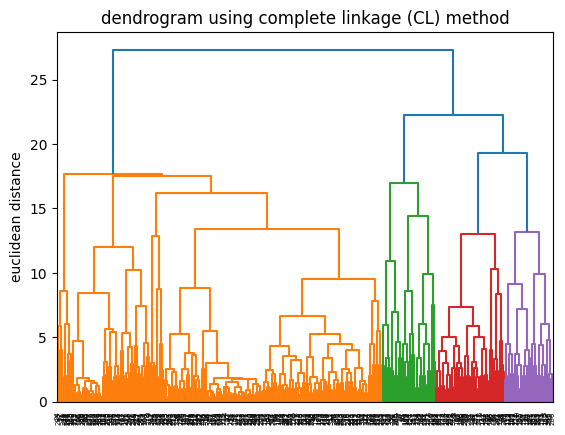

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

#visualize the dendrogram using complete linkage (CL) method .
linkage_data = linkage(data, method='complete', metric='euclidean')
print(linkage_data)
dendrogram(linkage_data)
plt.title("dendrogram using complete linkage (CL) method")
plt.ylabel("euclidean distance")
plt.show()

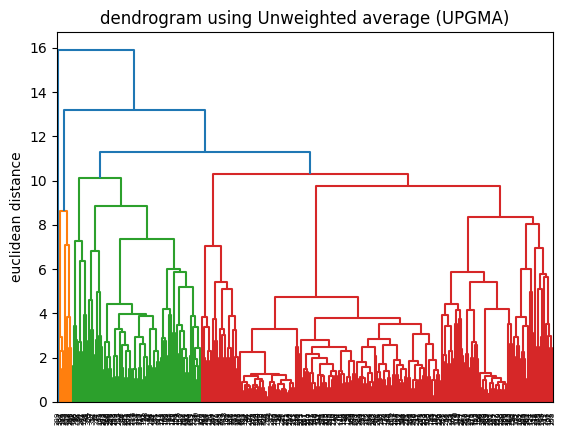

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

#visualize the dendrogram using complete linkage (CL) method .
linkage_data = linkage(data, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.title("dendrogram using Unweighted average (UPGMA)")
plt.ylabel("euclidean distance")
plt.show()

In [16]:
#initialize the AgglomerativeClustering class with 6 clusters, using the same euclidean distance and complete linkage.

hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')

In [17]:
y_pred = hierarchical_cluster.fit_predict(data) 
print(y_pred)

[5 3 2 1 2 0 3 0 3 1 2 4 5 2 2 2 2 2 4 2 1 5 2 2 4 0 0 0 2 5 5 1 3 2 0 2 2
 2 2 2 2 5 2 3 2 2 2 3 3 2 0 2 2 0 0 3 2 4 5 1 3 1 1 5 2 5 2 1 2 2 2 5 0 5
 2 1 2 3 5 2 2 2 3 0 3 3 3 2 2 3 5 3 3 0 2 0 3 2 2 2 0 2 2 1 2 5 1 5 2 3 2
 2 3 1 2 4 2 0 3 1 2 3 2 2 0 3 2 2 1 0 3 0 1 2 1 2 2 2 2 3 2 2 1 0 2 1 3 3
 5 0 2 1 1 5 0 5 0 0 3 5 4 2 2 5 5 2 3 2 5 1 2 5 1 2 2 2 5 2 3 2 2 2 0 2 5
 2 1 2 0 2 1 0 2 3 1 1 2 2 2 2 1 1 2 2 3 3 0 5 5 0 2 5 2 5 2 2 2 5 4 2 2 2
 2 2 1 2 5 5 3 2 2 2 2 0 0 0 5 2 2 2 5 2 3 4 0 2 2 2 2 2 2 2 2 2 2 1 2 5 2
 5 5 2 2 2 4 2 5 2 2 2 5 2 5 2 2 2 5 2 3 2 2 3 3 2 3 4 0 5 3 5 2 3 0 2 5 3
 4 5 2 5 0 3 2 5 5 2 2 5 2 3 5 1 2 2 2 2 3 2 2 5 1 2 1 2 2 2 2 0 2 3 3 0 2
 2 2 2 5 2 5 5 2 3 2 2 2 5 1 3 2 5 2 1 0 2 2 3 2 0 5 2]


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
import numpy as np

# Perform label matching using the Hungarian algorithm
y_true_matched = np.zeros_like(y_pred)
for i in np.unique(y_pred):
    mask = y_pred == i
    print(class_[mask])
    count = np.bincount(class_[mask])
    true_label = np.argmax(count)
    y_true_matched[mask] = true_label

print(y_true_matched)

[1 6 1 6 6 6 6 6 5 6 1 1 1 1 5 6 1 6 6 6 1 6 6 1 6 6 1 6 6 6 1 6 1 1 6 6 6
 6 6]
[1 6 1 6 1 1 1 6 1 6 6 1 6 1 6 1 6 1 6 1 1 1 1 1 1 1 6 1 1 6 1 1 6 1 6]
[2 4 2 2 2 2 2 4 2 2 4 6 2 4 2 4 4 1 4 2 4 2 4 4 2 2 2 2 2 2 4 2 2 2 6 6 4
 2 2 2 4 2 2 4 1 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 6 6 1 6 2 4 2 6 6
 6 2 2 2 2 2 2 2 6 2 4 4 4 4 2 2 6 2 4 4 2 4 2 2 2 4 6 2 4 2 2 2 2 2 2 2 2
 2 2 4 4 4 2 2 1 2 4 4 6 2 2 2 4 2 2 6 2 6 2 4 4 6 6 6 6 2 2 1 4 6 2 2 2 2
 4 2 6 2 4 6 2 2 2 2 2 2 2 2 4 2 2 2 2 6]
[5 5 5 5 6 5 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 6 5 5 6 5 5 5 5 5 5 6 5 6 6 5
 6 5 5 5 5 6 6 5 5 5 5 5 6]
[1 6 6 1 6 1 6 1 6 6 1]
[1 1 6 6 3 6 3 1 3 6 6 6 3 6 1 3 1 3 3 3 1 1 6 6 3 1 3 1 6 1 3 3 3 6 3 1 3
 1 3 3 1 3 3 6 6 1 1 6 6 1 1 6 6 3 6 1 3]
[3 5 2 1 2 6 5 6 5 1 2 6 3 2 2 2 2 2 6 2 1 3 2 2 6 6 6 6 2 3 3 1 5 2 6 2 2
 2 2 2 2 3 2 5 2 2 2 5 5 2 6 2 2 6 6 5 2 6 3 1 5 1 1 3 2 3 2 1 2 2 2 3 6 3
 2 1 2 5 3 2 2 2 5 6 5 5 5 2 2 5 3 5 5 6 2 6 5 2 2 2 6 2 2 1 2 3 1 3 2 5 2
 2 5 1 2 6 2 6 5 1 2 5 2 2 6 5 2 2 1

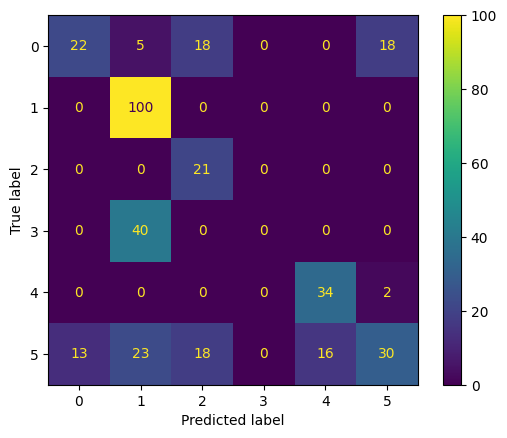

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = class_
predicted = y_true_matched

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()